In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


## EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data[data.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [7]:
data = data.rename({'Undergrad':'under_grad', 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income',
                    'City.Population':'city_population', 'Work.Experience':'work_experience', 'Urban':'urban'}, axis = 1)
data.head()

,under_grad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### Create numerical variables for all categorical data, with label encoding

In [8]:
label_encoder = preprocessing.LabelEncoder()
data['under_grad']= label_encoder.fit_transform(data['under_grad']) 
data['marital_status']= label_encoder.fit_transform(data['marital_status']) 
data['urban']= label_encoder.fit_transform(data['urban']) 

In [9]:
data["taxable_category"]=(data["taxable_income"]>30000)*1
data

,under_grad,marital_status,taxable_income,city_population,work_experience,urban,taxable_category
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [10]:
data1 = data.drop('taxable_income', axis = 1)
data1

,under_grad,marital_status,city_population,work_experience,urban,taxable_category
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


In [11]:
x = data1.drop('taxable_category', axis = 1)
y = data1['taxable_category']

In [12]:
x

,under_grad,marital_status,city_population,work_experience,urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: taxable_category, Length: 600, dtype: int32

In [14]:
kfold=KFold(n_splits=10,random_state=42,shuffle=True)

In [15]:
model = RandomForestClassifier(n_estimators=110, max_features=3)

In [16]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7366666666666667


In [17]:
#Splitting Data into Training and test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [18]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

In [19]:
y_pred=model.predict(x_train)

In [20]:
print("accuracy:",metrics.accuracy_score(y_train,y_pred))

accuracy: 1.0


In [21]:
model.score(x_train, y_train)

1.0

In [157]:
y_pred=model.predict(x_test)

In [158]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7444444444444445


In [22]:
model.score(x_test, y_test)

0.75

**Identifying the important features that contribute to the output and sorting it in ascending order**

In [24]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

city_population    0.529184
work_experience    0.294661
marital_status     0.074201
urban              0.058240
under_grad         0.043713
dtype: float64

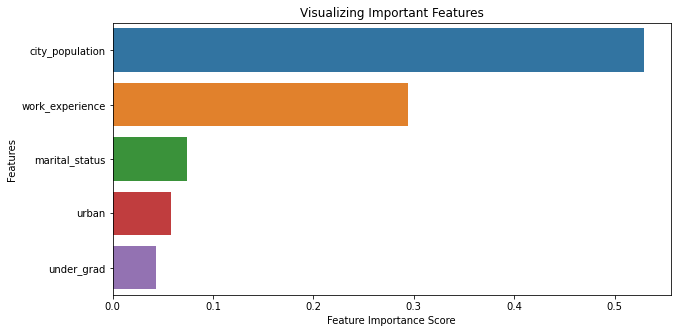

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()